In [1]:
import tensorflow as tf

def create_alexnet_core(input_shape=(227, 227, 3), num_classes=5):  # Change 1000 to 5
    # Input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Layer 1: Convolution + ReLU + Max Pooling
    x = tf.keras.layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Layer 2: Convolution + ReLU + Max Pooling
    x = tf.keras.layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Layer 3: Convolution + ReLU
    x = tf.keras.layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu')(x)

    # Layer 4: Convolution + ReLU
    x = tf.keras.layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu')(x)

    # Layer 5: Convolution + ReLU + Max Pooling
    x = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Flatten and Fully Connected Layers
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # Use num_classes

    model2 = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model2

# Load dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/yagni/Downloads/dataset/Citrus Leaf Disease Image',
    image_size=(227, 227),
    batch_size=32,
    label_mode='categorical'
)

# Preprocess the dataset (normalize pixel values)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess)

# Create and compile the AlexNet model
alexnet_model = create_alexnet_core(input_shape=(227, 227, 3), num_classes=5)  # Set num_classes to 5
alexnet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
alexnet_model.fit(train_dataset, epochs=10)


Found 607 files belonging to 5 classes.
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3163 - loss: 2.7351  
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.2965 - loss: 1.4116
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3344 - loss: 1.3919
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3031 - loss: 1.3905
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3361 - loss: 1.3876
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3278 - loss: 1.3783  
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3526 - loss: 1.3441
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3427 - loss: 1.5247
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3311 - loss: 1.3880
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3361 - loss: 1.3953


In [15]:
#7) Evaluate + diagnostics
loss, acc =alexnet_model.evaluate(val_generator)
print(f"Validation accuracy: {acc*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 875ms/step - accuracy: 0.2797 - loss: 9.9983  
Validation accuracy: 27.97%


In [2]:
# Optional: Save model
alexnet_model.save("citrus_leaf_disease_alexnet_model.h5")

In [3]:
from ipyfilechooser import FileChooser
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input
import matplotlib.pyplot as plt

# Load model
alexnet_model= tf.keras.models.load_model("citrus_leaf_disease_alexnet_model.h5")
class_labels = ['Black spot', 'Canker', 'Greening', 'Healthy', 'Melanose']
IMG_SIZE = 256

# Create file chooser widget
fc = FileChooser()
display(fc)

FileChooser(path='C:\Users\yagni', filename='', title='', show_hidden=False, select_desc='Select', change_desc…

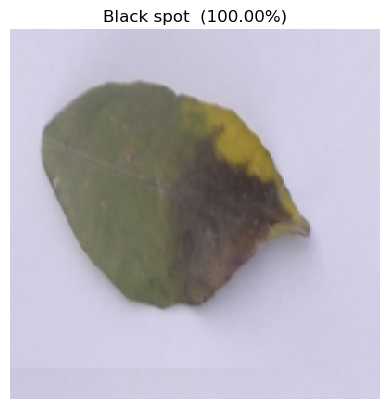

🖼️ Image (10).png → Black spot (confidence: 100.00%)


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Define the correct input size for AlexNet
IMG_SIZE = 227  # Must match the model's input shape

# Example: file_path from a file chooser (fc.selected)
file_path = fc.selected  # Replace with your actual file selection logic

if file_path:
    # Load and resize image to 227x227
    img = image.load_img(file_path, target_size=(IMG_SIZE, IMG_SIZE))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict
    probs = alexnet_model.predict(x, verbose=0)
    top = int(np.argmax(probs))
    pred, conf = class_labels[top], float(probs[0, top])

    # Display
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{pred}  ({conf*100:.2f}%)")
    plt.show()

    print(f"🖼️ {os.path.basename(file_path)} → {pred} (confidence: {conf*100:.2f}%)")
else:
    print("❌ No file selected.")

In [11]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use appropriate preprocessing
    validation_split=VAL_SPLIT
)

val_generator = val_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(227, 227),  # Change this to 227x227
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 118 images belonging to 5 classes.


In [12]:
def create_alexnet_model(input_shape=(227, 227, 3), num_classes=5):
    model = Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape))
    # ... rest of the model
    return model


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict class probabilities for validation data
Y_pred = alexnet_model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report (Precision, Recall, F1-score per class)
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 995ms/step
Confusion Matrix:
[[33  0  0  0  0]
 [32  0  0  0  0]
 [40  0  0  0  0]
 [11  0  0  0  0]
 [ 2  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

  Black spot       0.28      1.00      0.44        33
      Canker       0.00      0.00      0.00        32
    Greening       0.00      0.00      0.00        40
     Healthy       0.00      0.00      0.00        11
    Melanose       0.00      0.00      0.00         2

    accuracy                           0.28       118
   macro avg       0.06      0.20      0.09       118
weighted avg       0.08      0.28      0.12       118



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
